In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
from scipy.stats import sem
from sklearn import metrics
import pandas as pd
target_names = ['non-patient', 'patient']

In [2]:
def CI(y_true, y_pred):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))

In [3]:
fivefolds_label = pd.read_csv('../data/biclass2.txt', sep=' ')
fivefolds_label.rename(columns = {'file':'name'}, inplace = True)
fivefolds_label['name'] =  fivefolds_label['name'].str.replace('CTT', '').astype(int)
fivefolds_label['label'] =  fivefolds_label['label'].astype(bool).astype(str)
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('False', 'NC')
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('True', 'AD')

## whisper

In [4]:
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,-0.268371,0.0,True,NC
1,2,-0.043697,0.0,True,NC
2,3,-0.028775,0.0,True,NC
3,4,0.421157,0.5,True,AD
4,5,0.140481,0.5,False,AD
5,6,0.113489,0.0,True,NC
6,7,-0.050333,0.0,True,NC
7,8,0.159896,0.0,True,NC
8,9,0.527039,2.0,False,AD
9,10,0.291048,0.5,True,AD


In [5]:
WhisperForAudioClassification_v2_15k.tail(38)

,name,hyps,truth,ifcorrect,label
50,58,0.379095,0.5,True,AD
51,63,0.470899,0.5,True,AD
52,64,0.626885,1.0,True,AD
53,65,0.488403,0.5,True,AD
54,67,0.417985,0.5,True,AD
55,68,0.167356,0.0,True,NC
56,69,0.370905,0.0,False,NC
57,70,0.138293,0.0,True,NC
58,71,0.057711,0.0,True,NC
59,72,0.202823,0.0,True,NC


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  0.37098814238707756
mae:  0.17781837106634735
mse:  0.07017169841350372
rmse:  0.26489941187836513
r2:  0.3679445972501625


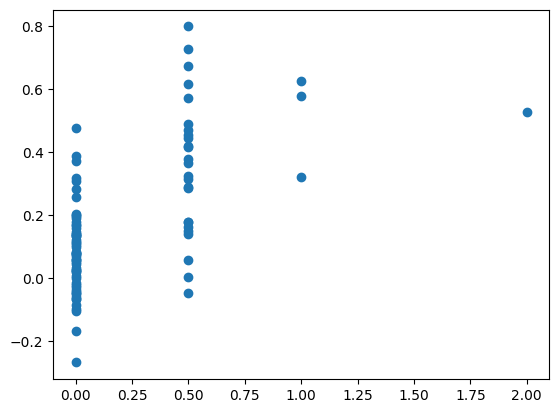

In [9]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

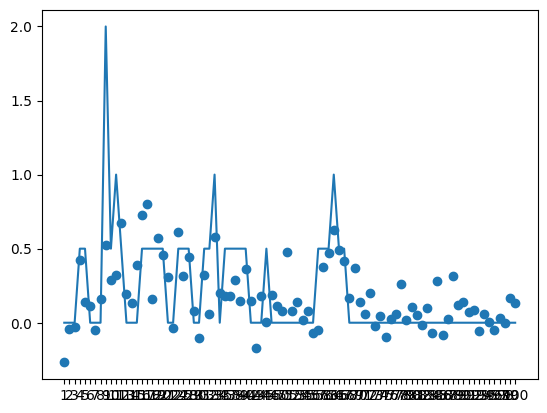

In [10]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_hyps)
plt.plot(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_truth)
plt.show()

<Axes: >

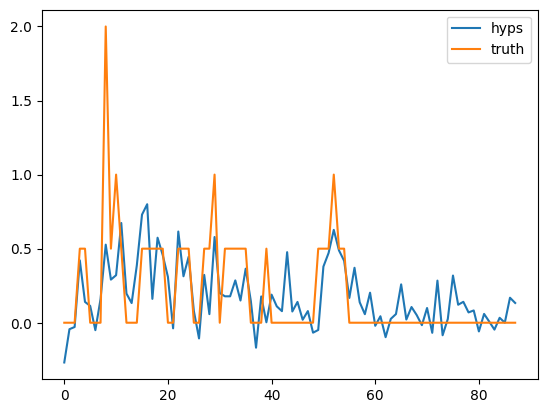

In [11]:
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k_noname.drop(['name'], axis=1)
WhisperForAudioClassification_v2_15k_noname.plot()

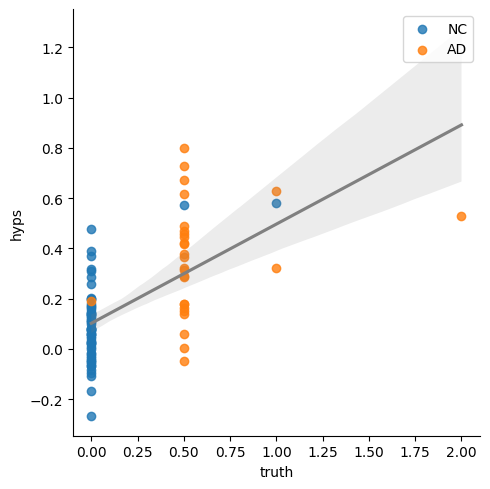

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()

# save the plot as PNG file
plt.savefig("CDR_v2.png")
plt.savefig("CDR_v2.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

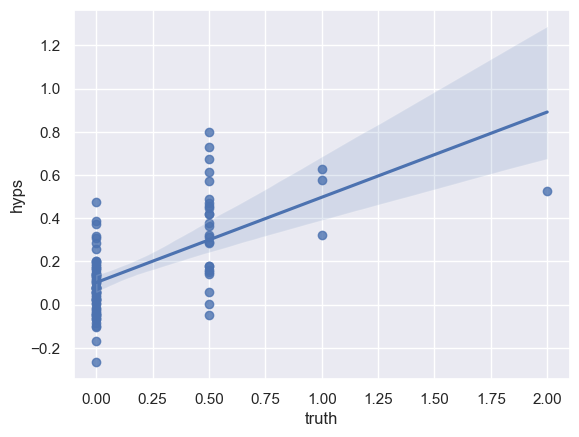

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

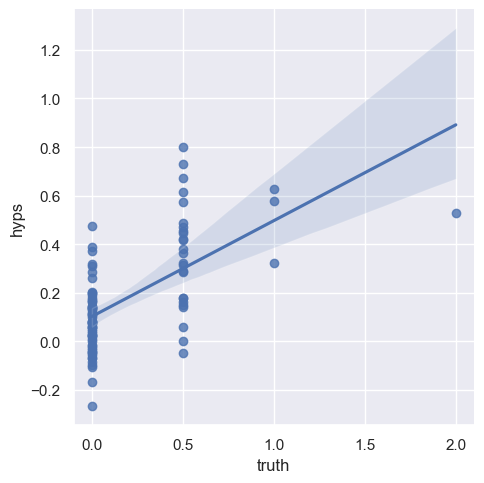

In [14]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

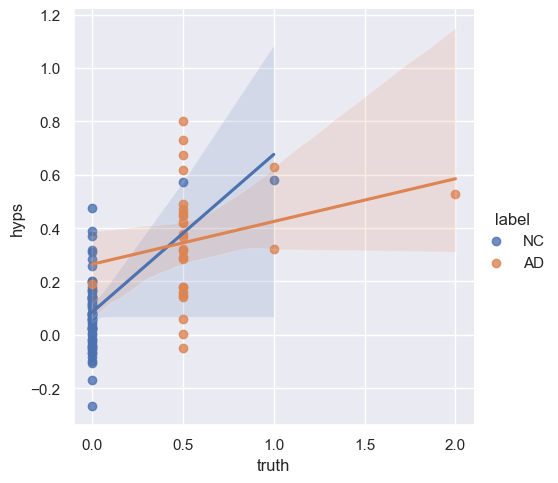

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=WhisperForAudioClassification_v2_15k)

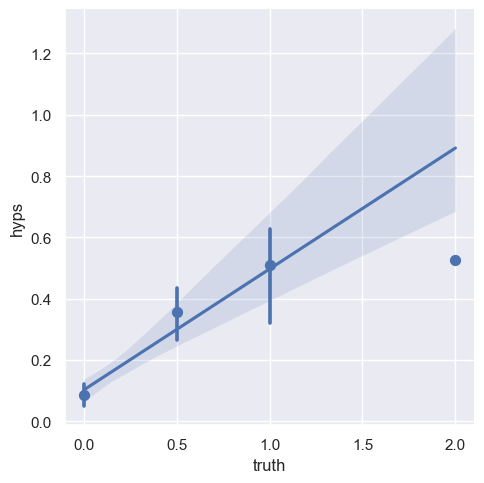

In [16]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, x_estimator=np.mean);

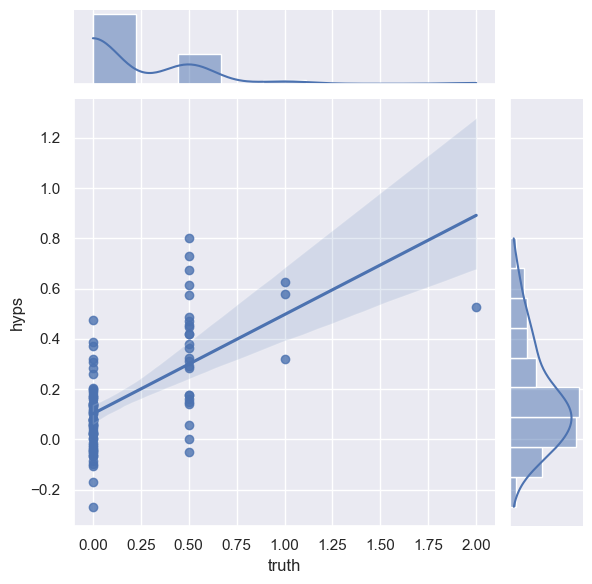

In [17]:
sns.jointplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, kind="reg")

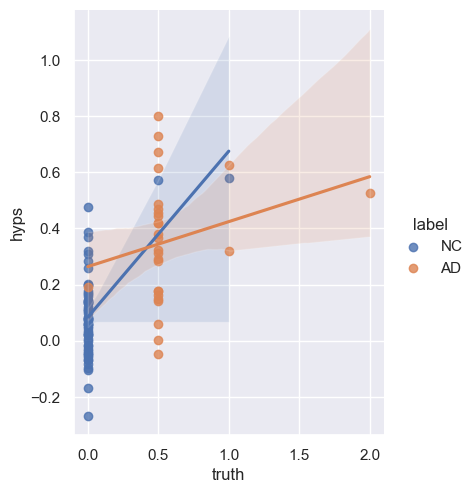

In [18]:
sns.pairplot(WhisperForAudioClassification_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  -0.2718370078124366
mae:  0.26177797780225154
mse:  0.10596267964468582
rmse:  0.3255190925962498
r2:  -1.1251404084295324
evs:  -0.05425135235055767
mae:  0.18392529294619128
mse:  0.06605030320854126
rmse:  0.2570025354126711
r2:  -0.25884107291572733
evs:  0.0
mae:  0.13448824949206456
mse:  0.035283520932005145
rmse:  0.18783908254675102
r2:  0.0
evs:  0.00675186176693654
mae:  0.30979426424292955
mse:  0.23146050131261836
rmse:  0.48110342059958205
r2:  -0.04518882623979237
evs:  0.29015283247658175
mae:  0.19784228635184906
mse:  0.062255222894232916
rmse:  0.2495099655208844
r2:  -0.12448496352708194


,train_mae,test_mae
0,0.154699,0.261778
1,0.156229,0.183925
2,0.157715,0.134488
3,0.157715,0.309794
4,0.157715,0.197842


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

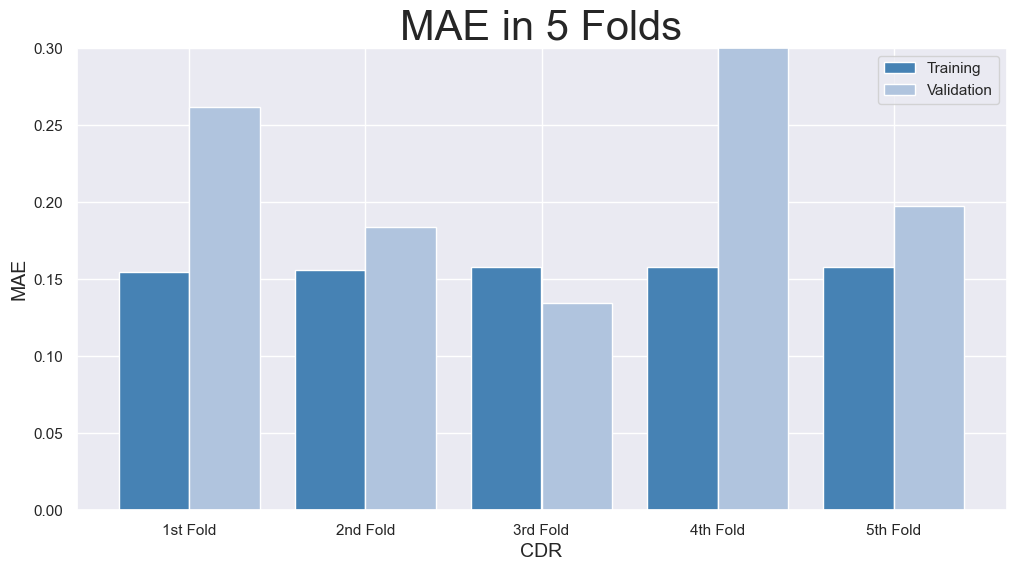

In [21]:
model_name = "CDR"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## BERT

In [4]:
bert_v2_15k = pd.read_csv('bert-v2-15k.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
bert_v2_15k['label'] = fivefolds_label['label']
bert_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,0.092962,0.0,True,NC
1,2,-0.085080,0.0,True,NC
2,3,-0.234902,0.0,True,NC
3,4,0.568429,0.5,False,AD
4,5,-0.268895,0.5,False,AD
5,6,0.056052,0.0,True,NC
6,7,0.129483,0.0,True,NC
7,8,-0.111593,0.0,True,NC
8,9,0.384191,2.0,False,AD
9,10,0.402628,0.5,True,AD


In [5]:
bert_v2_15k.tail(38)

,name,hyps,truth,ifcorrect,label
50,58,0.502592,0.5,False,AD
51,63,0.218565,0.5,False,AD
52,64,0.340315,1.0,False,AD
53,65,0.732927,0.5,False,AD
54,67,0.606813,0.5,False,AD
55,68,0.813784,0.0,False,NC
56,69,0.245469,0.0,True,NC
57,70,-0.007884,0.0,True,NC
58,71,0.070374,0.0,True,NC
59,72,-0.006135,0.0,True,NC


In [6]:
bert_v2_15k_result = bert_v2_15k['ifcorrect'].tolist()
bert_v2_15k_hyps = bert_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = bert_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = bert_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in bert_v2_15k['hyps'].tolist()]
bert_v2_15k_truth = [float(i) for i in bert_v2_15k['truth'].tolist()]
bert_v2_15k_name = [str(i).replace("CTT", "") for i in bert_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps)))
print('r2: ', metrics.r2_score(bert_v2_15k_truth, bert_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps)

evs:  -0.015422756238674618
mae:  0.23128423776837403
mse:  0.11274467650114793
rmse:  0.3357747407133954
r2:  -0.015521692148751987


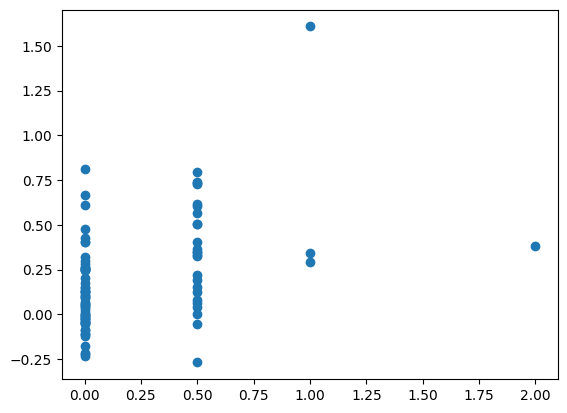

In [9]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_truth, bert_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

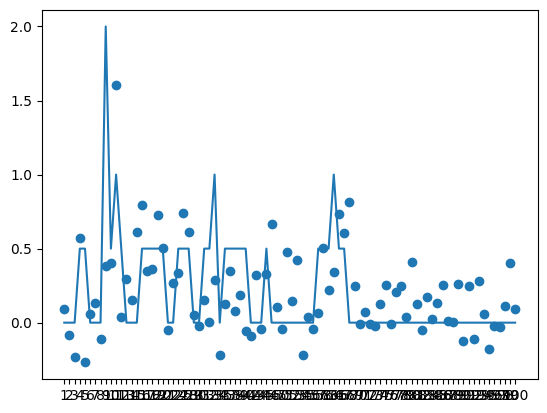

In [10]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_name, bert_v2_15k_hyps)
plt.plot(bert_v2_15k_name, bert_v2_15k_truth)
plt.show()

<Axes: >

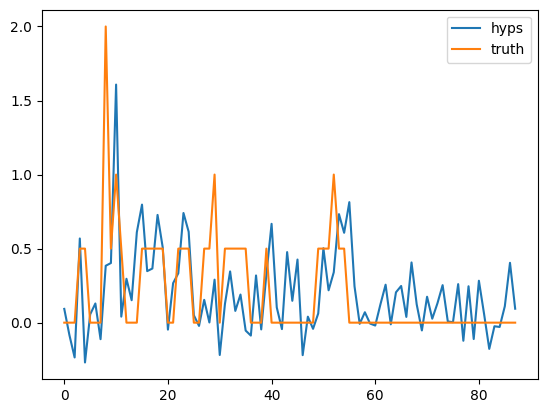

In [11]:
bert_v2_15k_noname = bert_v2_15k
bert_v2_15k_noname = bert_v2_15k_noname.drop(['name'], axis=1)
bert_v2_15k_noname.plot()

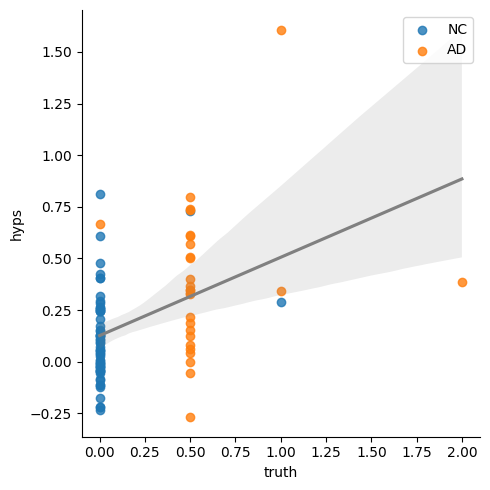

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(bert_v2_15k['truth'],bert_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=bert_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()

# save the plot as PNG file
plt.savefig("CDR_v2_bert.png")
plt.savefig("CDR_v2_bert.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

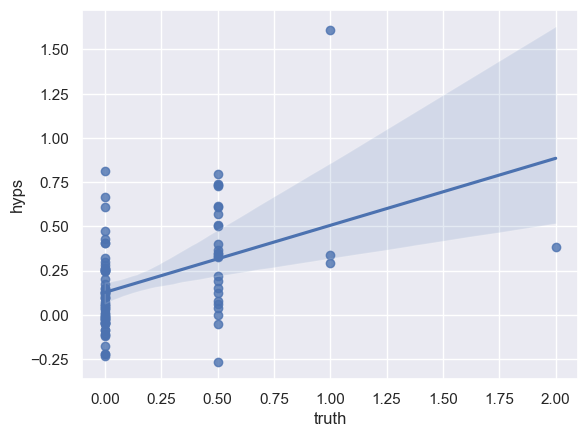

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=bert_v2_15k)

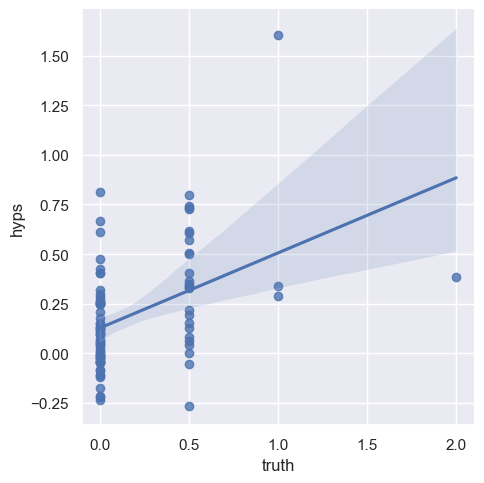

In [14]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k)

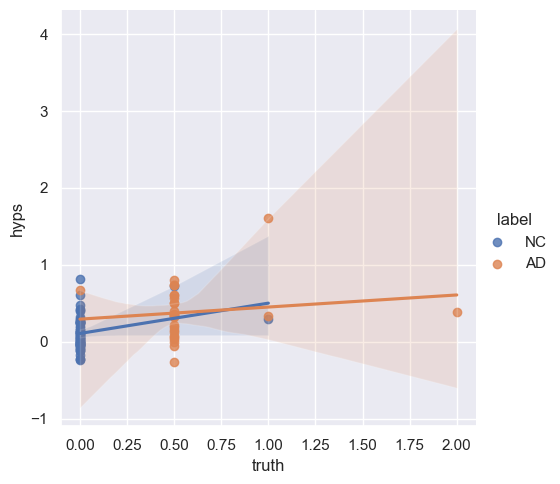

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=bert_v2_15k)

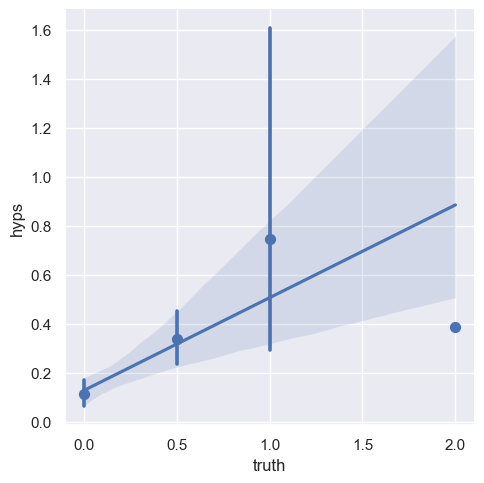

In [16]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k, x_estimator=np.mean);

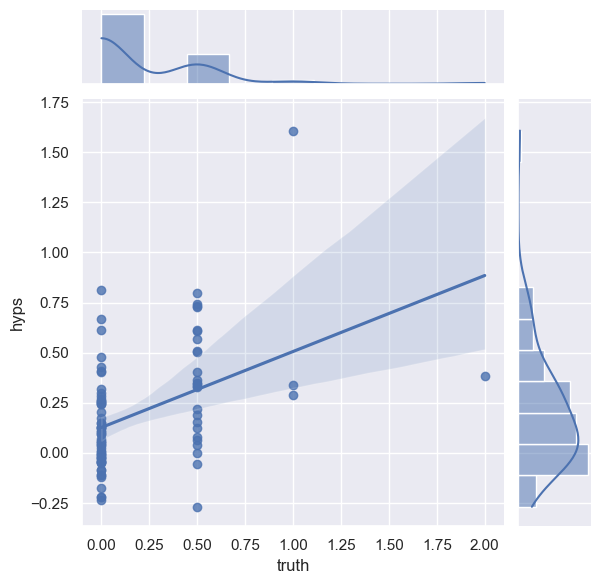

In [17]:
sns.jointplot(x="truth", y="hyps", data=bert_v2_15k, kind="reg")

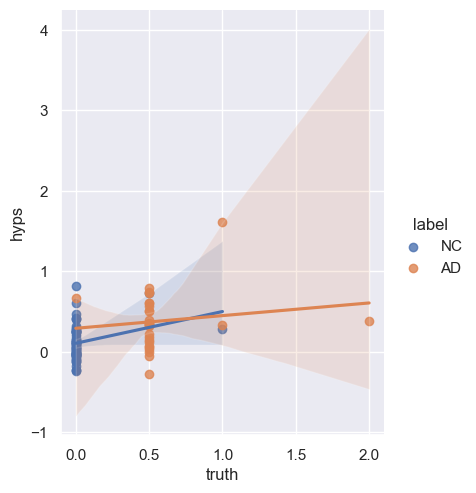

In [18]:
sns.pairplot(bert_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('bert-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(bert_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('bert-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(bert_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('bert-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(bert_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('bert-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(bert_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('bert-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(bert_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  -1.5959441143441815
mae:  0.3119453091272398
mse:  0.16767753740628258
rmse:  0.40948447761335544
r2:  -2.3628661668704454
evs:  -0.43295021027010305
mae:  0.360300126278566
mse:  0.19740600585029228
rmse:  0.44430395659986227
r2:  -2.7623262291467463
evs:  0.0
mae:  0.18634928861523375
mse:  0.05983780314350942
rmse:  0.2446176672759133
r2:  0.0
evs:  0.11481582964844661
mae:  0.2400565107407815
mse:  0.19603161503191419
rmse:  0.4427545765228341
r2:  0.11479473837151244
evs:  -0.11205915492516239
mae:  0.18704814203631348
mse:  0.061821727104002216
rmse:  0.2486397536678361
r2:  -0.11665494581603997


,train_mae,test_mae
0,0.209073,0.311945
1,0.210543,0.360300
2,0.211971,0.186349
3,0.211971,0.240057
4,0.211971,0.187048


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

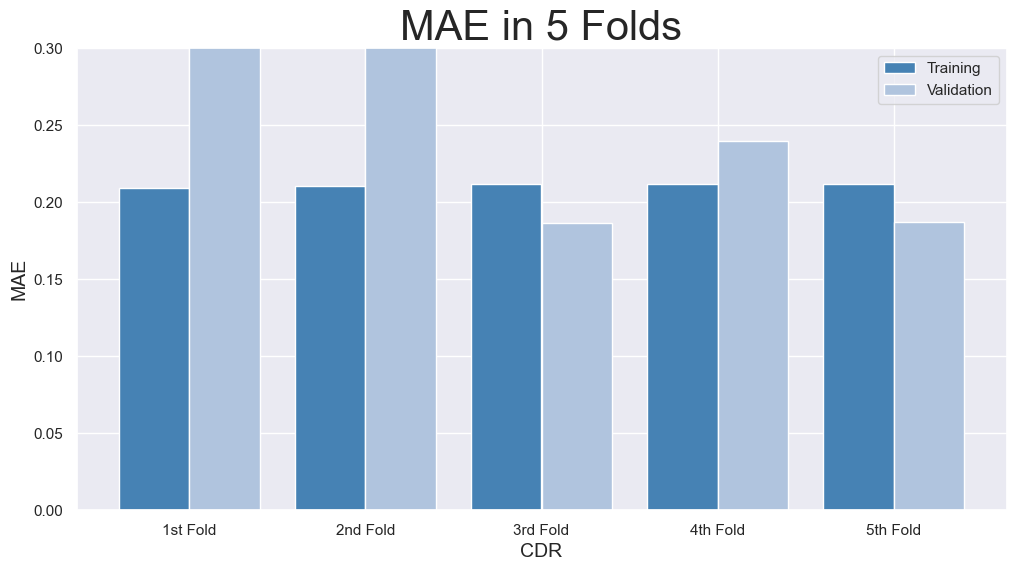

In [21]:
model_name = "CDR"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])